# An analysis of the State of the Union speeches - Part 5

In this notebook, you should explore one question or idea of your own from this dataset.  Provide the code and computations here, and summarize your points in the [main](main.ipynb) notebook.

The analysis in this notebook concerns the differences between Democratic and Republican Presidents

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import shelve

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
## Grabbing the intial text data

from io import StringIO
with open('data/stateoftheunion1790-2017.txt') as f:
    txt=f.read()
    
index = ['president', 'title', 'date','']
content = pd.read_csv(StringIO(txt), names = index, 
                   skiprows = 10, nrows=227, sep = ',', parse_dates=[[2,3]])

addresses = pd.DataFrame({'president': content['president'], 'title': content['title'], 'date' : content['date_']})
addresses = addresses[['president','title','date']]

In [4]:
with shelve.open('results/vars1') as db:
    speeches = db['speeches']

Here, we assign parties to presidents. 

In [5]:
parties_import = pd.read_html('http://www.enchantedlearning.com/history/us/pres/list.shtml', header = 0)[7]
parties_list = parties_import['Party'].values
parties_list = np.delete(parties_list, [8, 19, 23], None)
parties = pd.DataFrame({'president': addresses['president'].unique(), 'party': parties_list})
parties = parties[['president', 'party']]
parties.head()

,president,party
0,George Washington,"None, Federalist"
1,John Adams,Federalist
2,Thomas Jefferson,Democratic-Republican
3,James Madison,Democratic-Republican
4,James Monroe,Democratic-Republican


In [6]:
parties_ = addresses.president.map(parties.set_index('president').party)

In [7]:
addresses['party'] = parties_
addresses['speeches'] = speeches
addresses.head()

,president,title,date,party,speeches
0,George Washington,State of the Union Address,1790-01-08,"None, Federalist",\n\nState of the Union Address\nGeorge Washing...
1,George Washington,State of the Union Address,1790-12-08,"None, Federalist",\n\nState of the Union Address\nGeorge Washing...
2,George Washington,State of the Union Address,1791-10-25,"None, Federalist",\n\nState of the Union Address\nGeorge Washing...
3,George Washington,State of the Union Address,1792-11-06,"None, Federalist",\n\nState of the Union Address\nGeorge Washing...
4,George Washington,State of the Union Address,1793-12-03,"None, Federalist",\n\nState of the Union Address\nGeorge Washing...


In [8]:
democrats = addresses[addresses['party'] == 'Democrat']
republicans = addresses[addresses['party'] == 'Republican']

In [9]:
democrats['president'].describe()

count                          85
unique                         14
top         Franklin D. Roosevelt
freq                           12
Name: president, dtype: object

In [10]:
republicans['president'].describe()

count                         90
unique                        18
top         Dwight D. Eisenhower
freq                           9
Name: president, dtype: object

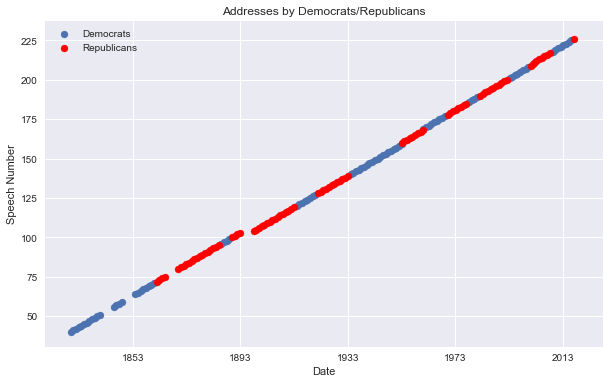

In [11]:
## We plotted which addresses were made by republicans, and which were made by democrats

f, ax = plt.subplots()
plt.grid()
ax.scatter(democrats['date'].values, democrats['date'].index, label = 'Democrats')
ax.scatter(republicans['date'].values, republicans['date'].index, c = 'r', label = 'Republicans')
ax.legend()
ax.set_title('Addresses by Democrats/Republicans')
ax.set_xlabel('Date')
ax.set_ylabel('Speech Number')
plt.savefig("fig/AddressesByParty.png")

Here, we illustrate the differing parties according to the speech lengths they had

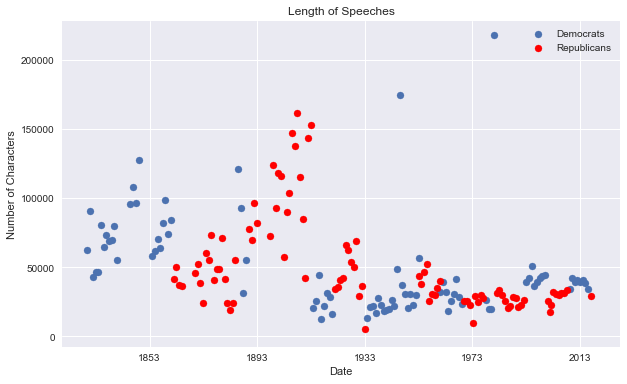

In [12]:
f, ax = plt.subplots()
plt.grid()
ax.scatter(democrats['date'].values, democrats['speeches'].apply(len), label = 'Democrats')
ax.scatter(republicans['date'].values, republicans['speeches'].apply(len), c = 'r', label = 'Republicans')
ax.legend()
ax.set_title('Length of Speeches')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Characters')
plt.savefig("fig/LengthOfSpeechesByParty.png")

In [13]:
democrats['speeches'].apply(len).describe()

count        85.000000
mean      49377.011765
std       34817.513449
min       12801.000000
25%       26342.000000
50%       39516.000000
75%       62952.000000
max      218009.000000
Name: speeches, dtype: float64

In [14]:
republicans['speeches'].apply(len).describe()

count        90.000000
mean      51305.444444
std       34822.718962
min        5649.000000
25%       28712.000000
50%       38399.500000
75%       62085.500000
max      162011.000000
Name: speeches, dtype: float64

The Republicans generally have longer speeches. Much of this is due to Theodore Roosevelt's lengthy addresses.

In [15]:
democrats['speeches'] = democrats['speeches'].apply(lambda x: x.replace('\n', ' '))

In [16]:
republicans['speeches'] = republicans['speeches'].apply(lambda x: x.replace('\n', ' '))

In [17]:
democrats['w_count'] = democrats['speeches'].apply(lambda x: len(x.split(' ')))

In [18]:
republicans['w_count'] = republicans['speeches'].apply(lambda x: len(x.split(' ')))

In [19]:
type(democrats['date'][40])

pandas._libs.tslib.Timestamp

In [45]:
republicans.sort_values('w_count', ascending = False)

,president,title,date,party,speeches,w_count
114,Theodore Roosevelt,State of the Union Address,1907-12-03,Republican,State of the Union Address Theodore Roosevel...,27540
119,William H. Taft,State of the Union Address,1912-12-03,Republican,State of the Union Address William H. Taft D...,25397
112,Theodore Roosevelt,State of the Union Address,1905-12-05,Republican,State of the Union Address Theodore Roosevel...,25167
118,William H. Taft,State of the Union Address,1911-12-05,Republican,State of the Union Address William H. Taft D...,24022
113,Theodore Roosevelt,State of the Union Address,1906-12-03,Republican,State of the Union Address Theodore Roosevel...,23704
105,William McKinley,State of the Union Address,1898-12-05,Republican,State of the Union Address William McKinley ...,20415
108,Theodore Roosevelt,State of the Union Address,1901-12-03,Republican,State of the Union Address Theodore Roosevel...,19768
115,Theodore Roosevelt,State of the Union Address,1908-12-08,Republican,State of the Union Address Theodore Roosevel...,19531
107,William McKinley,State of the Union Address,1900-12-03,Republican,State of the Union Address William McKinley ...,19386
111,Theodore Roosevelt,State of the Union Address,1904-12-06,Republican,State of the Union Address Theodore Roosevel...,17539


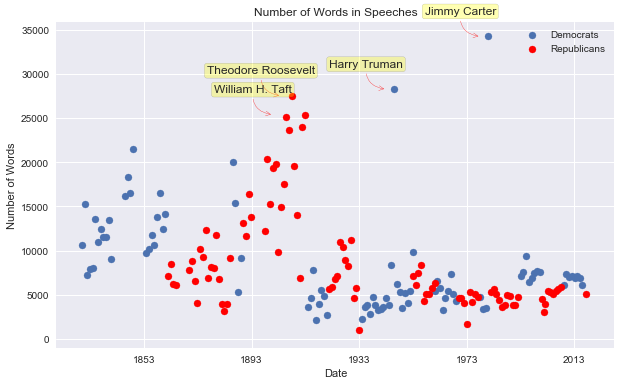

In [58]:
f, ax = plt.subplots()
plt.grid()
ax.scatter(democrats['date'].values, democrats['w_count'], label = 'Democrats')
ax.scatter(republicans['date'].values, republicans['w_count'], c = 'r', label = 'Republicans')
ax.legend()
ax.set_title('Number of Words in Speeches')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Words')
ax.annotate('Jimmy Carter', xy=(democrats['date'].values[65], max(democrats['w_count'])), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
ax.annotate('Harry Truman', xy=(democrats['date'].values[45], democrats['w_count'][152]), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
ax.annotate('Theodore Roosevelt', xy=(republicans['date'].values[30], max(republicans['w_count'])), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
ax.annotate('William H. Taft', xy=(republicans['date'].values[27], republicans['w_count'][119]), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
plt.savefig("fig/NumberOfWordsByParty.png")

In [22]:
# Correlation Function
from sklearn import linear_model
def regr(x, y):
    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color = 'black')
    plt.plot(x, regr.predict(x), color = 'yellow', linewidth = 2)

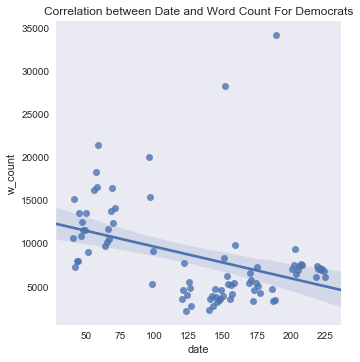

In [23]:
corr_table = pd.DataFrame({'date':democrats['date'].index, 'w_count': democrats['w_count'].values})
ax = sns.lmplot('date', 'w_count', corr_table)
sns.plt.title('Correlation between Date and Word Count For Democrats')
plt.savefig("fig/Date_WordCount_Corr_dem.png")

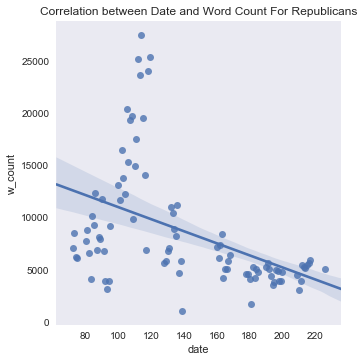

In [24]:
corr_table2 = pd.DataFrame({'date': republicans['date'].index, 'w_count': republicans['w_count'].values})
ax = sns.lmplot('date', 'w_count', corr_table2)
sns.plt.title('Correlation between Date and Word Count For Republicans')
plt.savefig("fig/Date_WordCount_Corr_rep.png")

We can see that word count and date are correlated for both Democrats and Republicans, but there is a more negative correlation for Republicans